# Hiring Prediction Project

This notebook implements data analysis and machine learning techniques to predict hiring based on factors like gender, education, and age.

## 1. Data Loading and Overview

In [7]:

import pandas as pd

# Load datasets
file_path = "../data/Salary_Data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Overview:\n", data.head())


Dataset Overview:
     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


## 2. Modularizing Code into Classes and Methods

In [8]:

class HiringPredictionPipeline:
    def __init__(self, data):
        self.data = data
        self.clean_data = None
    
    def preprocess_data(self):
        # Handle missing values
        self.clean_data = self.data.dropna()
        print("Preprocessed data shape:", self.clean_data.shape)
    
    def calculate_pearson_correlation(self, feature1, feature2):
        correlation = self.clean_data[feature1].corr(self.clean_data[feature2])
        print(f"Pearson Correlation between {feature1} and {feature2}: {correlation}")
        return correlation


## 3. Pearson's Correlation Analysis

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionPipeline:
    def __init__(self, data):
        if isinstance(data, pd.DataFrame):
            self.data = data
        else:
            raise ValueError("Provided data is not a Pandas DataFrame")
        self.model = None
        self.X = None
        self.y = None
        self.scaler = StandardScaler()

    def load_data(self):
        """Loads data into the pipeline."""
        print("Data loaded successfully. Here are the first few rows:")
        print(self.data.head())
        return self.data

    def clean_data(self):
        """Cleans the data by selecting relevant columns and removing any missing values."""
        if not isinstance(self.data, pd.DataFrame):
            raise ValueError("Data is not a Pandas DataFrame. Please check the data source.")
        
        print(f"Columns available in the dataset: {self.data.columns.tolist()}")

        # Convert Gender to numerical format: Male = 1, Female = 2
        self.data['Gender'] = self.data['Gender'].map({'Male': 1, 'Female': 2})

        # Replace similar education levels to have uniformity using .loc
        self.data.loc[:, 'Education Level'] = self.data['Education Level'].replace({
            "Bachelor's Degree": "Bachelor's",
            "Master's Degree": "Master's",
            "PhD": "phD"
        })

        # Drop rows with missing values
        self.data.dropna(inplace=True)

        # Optionally, check for duplicates
        self.data.drop_duplicates(inplace=True)

        print(f"Data cleaned with shape: {self.data.shape}")
        return self.data

    def remove_outliers(self, columns, method='iqr'):
        """Removes outliers from the dataset for the specified columns using the chosen method."""
        if method == 'iqr':
            for col in columns:
                Q1 = self.data[col].quantile(0.25)
                Q3 = self.data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                self.data = self.data[(self.data[col] >= lower_bound) & (self.data[col] <= upper_bound)]
        elif method == 'zscore':
            from scipy.stats import zscore
            z_scores = np.abs(zscore(self.data[columns]))
            self.data = self.data[(z_scores < 3).all(axis=1)]
        else:
            raise ValueError("Method must be either 'iqr' or 'zscore'.")

        print(f"Outliers removed. Data now has shape: {self.data.shape}")
        return self.data

    def split_data_based_on_gender(self):
        """Splits the data based on Gender: 1 = Male and 2 = Female."""
        male_data = self.data[self.data['Gender'] == 1]
        female_data = self.data[self.data['Gender'] == 2]

        print(f"Male data count: {male_data.shape[0]}")
        print(f"Female data count: {female_data.shape[0]}")

        return male_data, female_data

    def train_model(self, feature_columns, target_column):
        """Trains a linear regression model."""
        self.X = self.data[feature_columns]
        self.y = self.data[target_column]

        self.X = self.scaler.fit_transform(self.X)

        self.model = LinearRegression()
        self.model.fit(self.X, self.y)

        print("Model trained successfully.")
        print(f"Coefficients: {self.model.coef_}")
        print(f"Intercept: {self.model.intercept_}")

        return self.model

    def evaluate_model(self):
        """Evaluates the trained model."""
        if self.model is None:
            raise ValueError("Model has not been trained yet.")

        y_pred = self.model.predict(self.X)

        mse = mean_squared_error(self.y, y_pred)
        r2 = r2_score(self.y, y_pred)

        print(f"Model evaluation metrics:\nMean Squared Error: {mse}\nR^2 Score: {r2}")
        return mse, r2

    def calculate_pearson_correlation(self, feature1, feature2):
        """Calculates Pearson Correlation between two features."""
        correlation = self.data[feature1].corr(self.data[feature2])
        print(f"Pearson Correlation between {feature1} and {feature2}: {correlation}")
        return correlation

In [39]:
def clean_data(self):
    """Cleans the data by selecting relevant columns and removing any missing values."""
    if not isinstance(self.data, pd.DataFrame):
        raise ValueError("Data is not a Pandas DataFrame. Please check the data source.")
    
    print(f"Columns available in the dataset: {self.data.columns.tolist()}")

    # Convert Gender to numerical format: Male = 1, Female = 2
    self.data['Gender'] = self.data['Gender'].map({'Male': 1, 'Female': 2})

    # Replace similar education levels to have uniformity using .loc
    self.data.loc[:, 'Education Level'] = self.data['Education Level'].replace({
        "Bachelor's Degree": "Bachelor's",
        "Master's Degree": "Master's",
        "PhD": "phD"
    })

    # Ordinal encoding for Education Level
    education_mapping = {
        "High School": 1,
        "Bachelor's": 2,
        "Master's": 3,
        "phD": 4
    }
    self.data['Education Level'] = self.data['Education Level'].map(education_mapping)

    # Drop rows with missing values
    self.data.dropna(inplace=True)

    # Optionally, check for duplicates
    self.data.drop_duplicates(inplace=True)

    print(f"Data cleaned with shape: {self.data.shape}")
    return self.data

In [40]:
# Create an instance of the pipeline class
pipeline = LinearRegressionPipeline(data)

# Run the steps in the pipeline
pipeline.load_data()
pipeline.clean_data()

# Check for unique values in Education Level
print("Unique values in 'Education Level' after cleaning:", pipeline.data['Education Level'].unique())
print("Remaining NaN values:", pipeline.data.isna().sum())

# Now, you can calculate the Pearson correlation
pipeline.calculate_pearson_correlation('Education Level', 'Salary')
pipeline.calculate_pearson_correlation('Age', 'Salary')

Data loaded successfully. Here are the first few rows:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0     1.0      Bachelor's  Software Engineer                  5.0   
1  28.0     2.0        Master's       Data Analyst                  3.0   
2  45.0     1.0             phD     Senior Manager                 15.0   
3  36.0     2.0      Bachelor's    Sales Associate                  7.0   
4  52.0     1.0        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Columns available in the dataset: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
Data cleaned with shape: (0, 6)
Unique values in 'Education Level' after cleaning: []
Remaining NaN values: Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64
Pearson Correlation be

nan

## 4. Logistic Regression Implementation

Analyze factors influencing recruitment decisions using logistic regression.

Investigate potential biases or patterns by gender.

Evaluate model performance with standard metrics and visualizations (confusion matrix, ROC curve).

In [38]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale(df):
    scaled_df = df.copy()
    # Apply Min-Max scaling to numeric columns
    for column in scaled_df.select_dtypes(include='number').columns:
        min_val = scaled_df[column].min()
        max_val = scaled_df[column].max()

        # Scale the column
        scaled_df[column] = (scaled_df[column] - min_val) / (max_val - min_val)

    return scaled_df

# Assuming df_unfiltered is defined in a previous cell
df  = pd.read_csv("../data/Salary_Data.csv")
df = df.dropna()
scaled = min_max_scale(df)

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.73      0.78       567
        True       0.50      0.66      0.57       233

    accuracy                           0.71       800
   macro avg       0.67      0.70      0.68       800
weighted avg       0.74      0.71      0.72       800



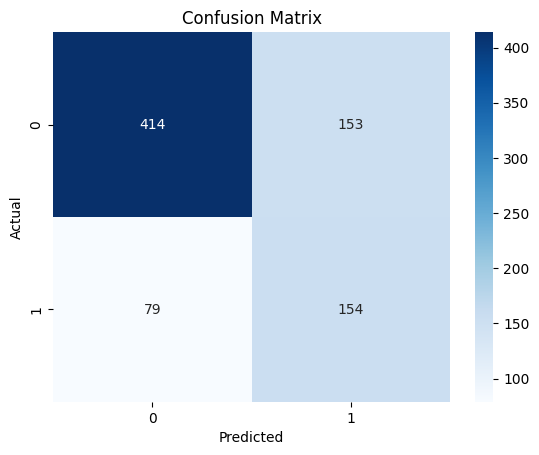

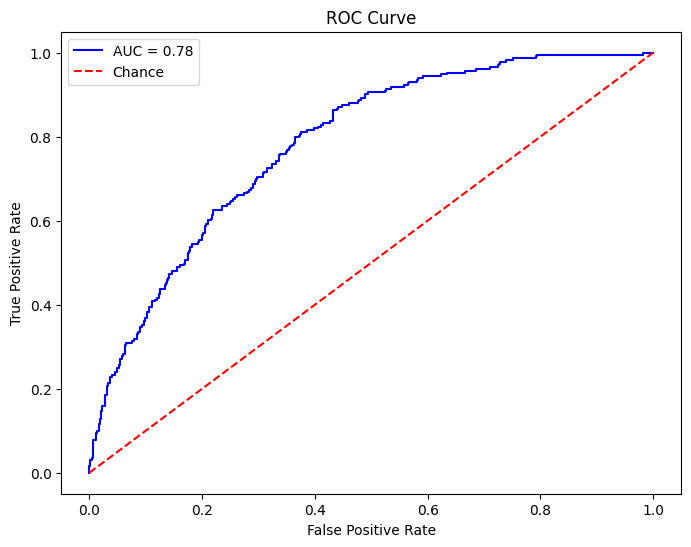


--- Logistic Regression for Gender: 0 ---
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.70      0.77       236
        True       0.58      0.80      0.67       122

    accuracy                           0.73       358
   macro avg       0.72      0.75      0.72       358
weighted avg       0.77      0.73      0.74       358



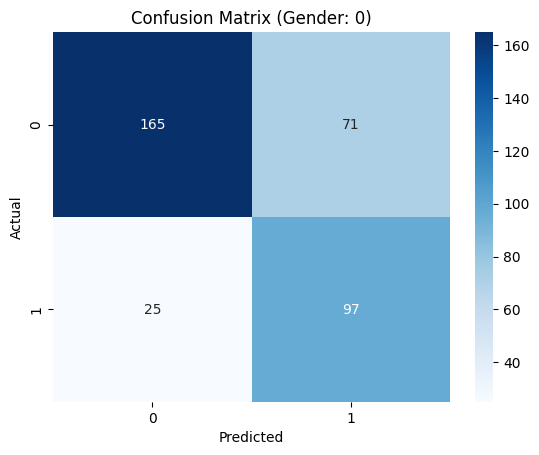

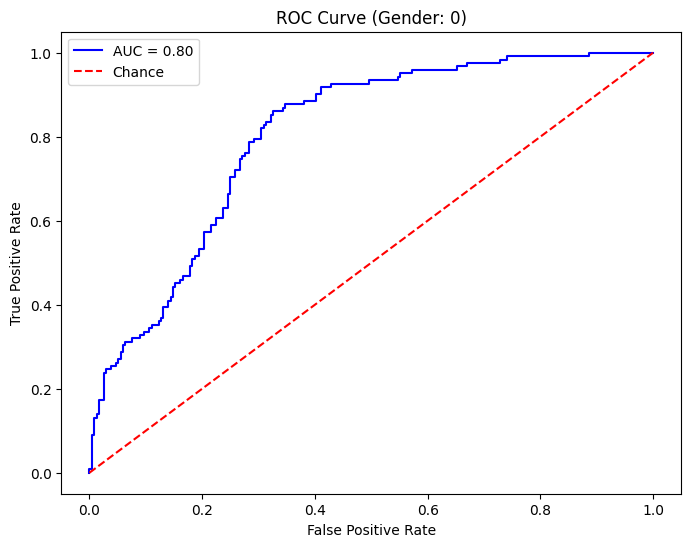


--- Logistic Regression for Gender: 1 ---
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.69      0.75       268
        True       0.58      0.73      0.65       158

    accuracy                           0.71       426
   macro avg       0.70      0.71      0.70       426
weighted avg       0.73      0.71      0.71       426



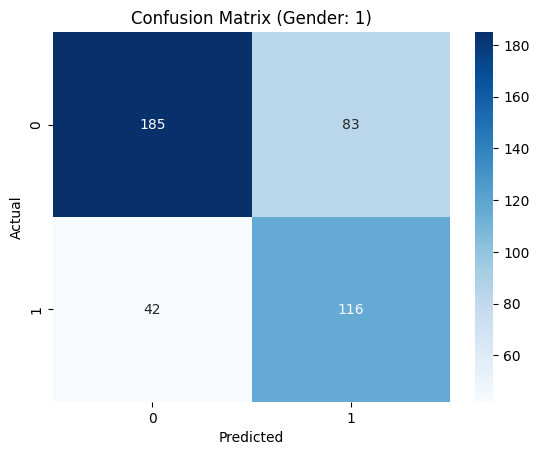

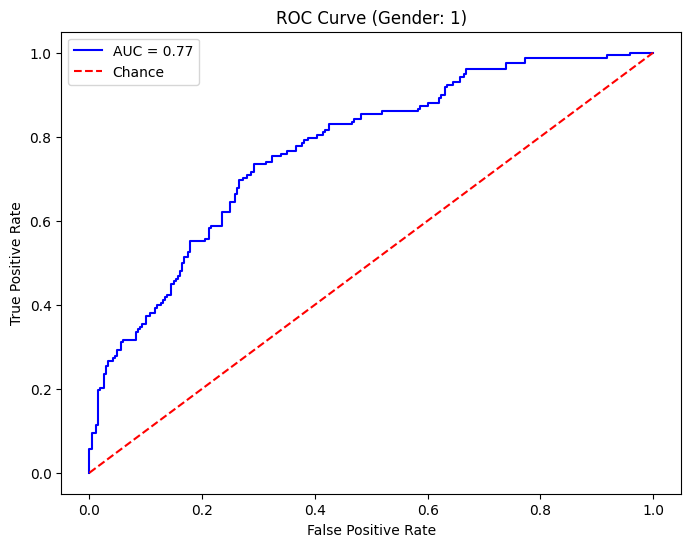

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/recruitment_dataset.csv')

# Preprocessing Function
def preprocess_data(df):
    """Preprocess dataset: encode categorical columns and scale numeric columns."""
    # Encode categorical columns dynamically
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Scale numeric columns dynamically
    scaler = MinMaxScaler()
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

# Preprocess the data
processed_data = preprocess_data(data)

# Features and Target Selection
X = processed_data.drop(columns=['Id', 'decision'])
y = processed_data['decision']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model with Class Weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Plot ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
    plt.plot([0, 1], [0, 1], "r--", label="Chance")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Calculate Probabilities and Plot ROC
y_prob = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob)

# Function to Train and Evaluate by Gender
def train_and_evaluate_by_gender(df, gender_value):
    """Train and evaluate logistic regression for a specific gender subset."""
    print(f"\n--- Logistic Regression for Gender: {gender_value} ---")
    
    # Filter dataset by gender
    gender_df = df[df['gender'] == gender_value]
    
    if gender_df.empty:
        print(f"No data available for gender: {gender_value}")
        return
    
    # Features and target for the gender subset
    X = gender_df.drop(columns=['Id', 'decision', 'gender'])
    y = gender_df['decision']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Logistic Regression Model
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions and Evaluation
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix and ROC Curve
    plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix (Gender: {gender_value})")
    y_prob = model.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_prob, title=f"ROC Curve (Gender: {gender_value})")

# Example Usage for Gender-Specific Analysis
train_and_evaluate_by_gender(processed_data, gender_value=0)  
train_and_evaluate_by_gender(processed_data, gender_value=1) 


The model performs better at predicting the "False" (Not Recruited) class with higher precision and recall. However, it struggles with the "True" (Recruited) class, showing lower precision and recall. This indicates class imbalance, as the model is biased toward the majority class, affecting overall performance.

> The logistic regression model performs better for the "True" (Recruited) class in the male dataset with a higher recall (0.80), indicating that it identifies recruited candidates well. However, the precision for "True" is lower (0.58), meaning some false positives are present. The "False" (Not Recruited) class shows higher precision (0.87), but lower recall (0.70), suggesting the model misses some non-recruited candidates. Overall, the model's performance is balanced, but could benefit from handling the class imbalance better.

> For the female dataset, the logistic regression model shows better recall for the "True" (Recruited) class (0.73), indicating it identifies recruited candidates fairly well, but with lower precision (0.58), leading to some false positives. The "False" (Not Recruited) class has a higher precision (0.81), but lower recall (0.69), meaning some non-recruited candidates are missed. The model's performance is relatively balanced but can be improved by addressing the imbalance between classes.

Imbalanced Performance:

Male Dataset: The model performs better for the "True" (Recruited) class in terms of recall (0.80), but precision is lower (0.58), meaning more false positives for males.
Female Dataset: While recall for the "True" class is also relatively good (0.73), the precision is still low (0.58), suggesting some false positives in predicting recruitment for females as well.
Precision-Recall Trade-off: The precision-recall trade-off indicates that the model might be biased toward predicting "False" (Not Recruited) for both males and females, with higher precision but lower recall in both cases. This can lead to under-predicting recruited candidates, especially for females, whose recall is lower than that of males (0.66 for females vs. 0.80 for males).

Class Imbalance: Gender imbalance (if the data has unequal representation of males and females) can affect the model’s ability to generalize to both genders equally. The model's overall recall for the "True" class is higher for males than for females, indicating potential gender bias in recruitment predictions.